Burgers' Equation:

In this lesson, we will be learning using burgers' equation analysis. This is a second order combination of non-linear convection and diffusion. 

It can be discretized by using the methods we've already detailed in the previous notebooks. Using forward in time, backward for space and our 2nd order method.

The stepping in time equation can be seen in the lesson notebook, and is too complicated to be written here.

Initial and Boundary Conditions

in order to use the initial condition accurately, we must import sympy to use make things easier

In [1]:
import numpy as ny
import sympy as sy
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
# set font family and size
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [3]:
sy.init_printing()
# this line tells sympy that we want outputs to be
#rendured using latex, which will make
# all of our equations look pretty

In [8]:
x, nu, t = sy.symbols('x nu t')
phi = (sy.exp(-(x - 4 *t)**2 / (4 * nu * (t + 1))) +
      sy.exp(-(x - 4 * t -2 * ny.pi)**2 / (4 * nu * (t + 1))))

In [9]:
phi

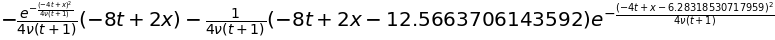

In [10]:
phiderive = phi.diff(x)
phiderive

In [11]:
# now, we have created a python version of our derivative,
# and we can use the lambdify function to turn it into
# a usable function. but we must first complete the initial condition

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [13]:
from sympy.utilities.lambdify import lambdify as ly

u = -2 * nu * (phiderive/ phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [16]:
u_lambda = ly((t, x, nu), u)
print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lambda(1, 4, 3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494


In [19]:
#now that we have initial conditions set up, we can
#continue to finish setup. set parameters and discretize
# the domain

nx = 101 # number of spatial grid points
L = 2.0 *ny.pi # length of the domain
dx = L / (nx - 1) #spatial grid size
nu = 0.07 #viscosity
nt = 100 # number of time steps to compute
sigma = 0.1 # CFL limit
dt = sigma * dx**2 / nu #time-step size

x = ny.linspace(0.0, L, num=nx)

array([6.28318531])

now that we have the function for u_lambda, we can create an array with our initial conditions, using list comprehension

In [31]:
t = 0.0
u0 = ny.array([u_lambda(t, xi, nu) for xi in x])

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

Now we can plot to see what the initial conditions actaully look like

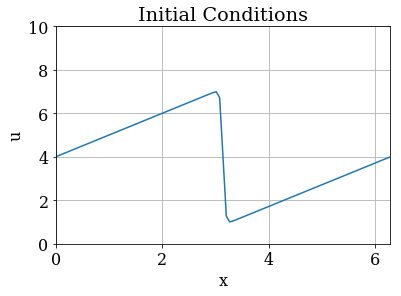

In [32]:
py.figure(figsize=(6.0, 4.0))
py.title('Initial Conditions')
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0)
py.xlim(0.0, L)
py.ylim(0.0, 10.0);

Now, we will apply the idea of periodic boundary conditions so that when a point gets to the right-hand side of the frame, it wraps around back to the front of the frame.

Integrate the burgers' equation in time


In [33]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # update all interior points
    u[1:-1] = (un[1:-1] - 
              un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
              nu * dt / dx ** 2 * (un[2:] - 2*un[1:-1] + un[:-2]))
    # update boundary points
    u[0]  = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2*un[0] + un[-1]))
    u[-1] = (un[-1] - 
            un[-1] * dt / dx * (un[-1] - un[-2]) + 
            nu * dt / dx**2 * (un[0] - 2* un[-1] + un[-2]))

In [34]:
# compute analytical solution
u_anal = ny.array([u_lambda(nt * dt, xi, nu) for xi in x])

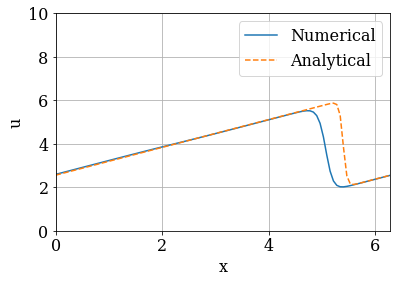

In [35]:
# now we plot the numerical solution along with the 
# analytical solution
py.figure(figsize=(6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u, label='Numerical', color='C0', linestyle='-')
py.plot(x, u_anal, label='Analytical', color='C1', linestyle='--')
py.legend()
py.xlim(0.0, L)
py.ylim(0.0, 10.0);

Now, we can create an animation and see how the numerical solution changes over time compared to the analytical solution.

In [36]:
from matplotlib import animation
from IPython.display import HTML

In [37]:
def burgers(u0, dx, dt, nu, nt = 20):
    
    # this equation computes the numerical solution of
    # the burgers equation over time.
    
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        # update all interior points
        u[1:-1] = (un[1:-1] - 
              un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
              nu * dt / dx ** 2 * (un[2:] - 2*un[1:-1] + un[:-2]))
        # update boundary points
        u[0]  = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2*un[0] + un[-1]))
        u[-1] = (un[-1] - 
            un[-1] * dt / dx * (un[-1] - un[-2]) + 
            nu * dt / dx**2 * (un[0] - 2* un[-1] + un[-2]))
        u_hist.append(u.copy())
    return u_hist

In [38]:
u_hist = burgers(u0, dx, dt, nu, nt)
# this computes the history of the numerical solution

In [39]:
u_analytical = [ny.array([u_lambda(n * dt, xi, nu) for xi in x])
               for n in range(nt)]

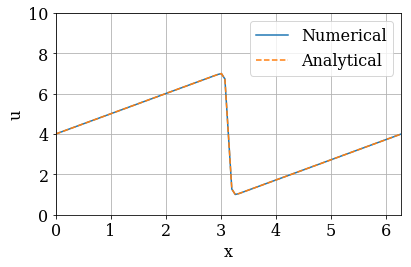

In [41]:
# now we create the plot and animation of figure
fig = py.figure(figsize=(6.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
u0_anal = ny.array([u_lambda(0.0, xi, nu) for xi in x])
line1 = py.plot(x, u0, label='Numerical', color='C0')[0]
line2 = py.plot(x, u0_anal, label= 'Analytical', color='C1', linestyle='--')[0]

py.legend()
py.xlim(0.0, L)
py.ylim(0.0, 10.0)
fig.tight_layout()

In [42]:
def update_plot(n, u_hist, u_analytical):
    
    #this function updates the lines y-data of the 
    #matplotlib figure
    
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [43]:
# create the animation here
anim = animation.FuncAnimation(fig, update_plot,
                              frames=nt, fargs = (u_hist, u_anal),
                              interval=100)

In [44]:
HTML(anim.to_html5_video())